# Ví dụ Thuật toán đơn giản

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu
X = np.array([1, 2, 3, 4, 5, 6])  # Số giờ học
y = np.array([2, 4, 6, 8, 8.5, 9])  # Điểm số

# Khởi tạo tham số ban đầu
m = 0  # Hệ số góc
b = 0  # Hệ số chặn
learning_rate = 0.01  # Tốc độ học
num_iterations = 10  # Số lần lặp

# Lưu trữ giá trị hàm mất mát
loss_history = []

# Gradient descent
for i in range(num_iterations):
    # Tính đầu ra dự đoán
    y_pred = m * X + b

    # Tính hàm mất mát
    loss = np.mean((y - y_pred) ** 2)
    loss_history.append(loss)

    # Tính gradient của hàm mất mát
    gradient_m = (-2 / len(X)) * np.sum(X * (y - y_pred))
    gradient_b = (-2 / len(X)) * np.sum(y - y_pred)

    # Cập nhật tham số
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b
    
#Hiển thị kết quả   
print('Hệ số góc m = ', m)
print('Hệ số chặn b =', b)

Hệ số góc m =  1.592437630498492
Hệ số chặn b = 0.4029423617105579


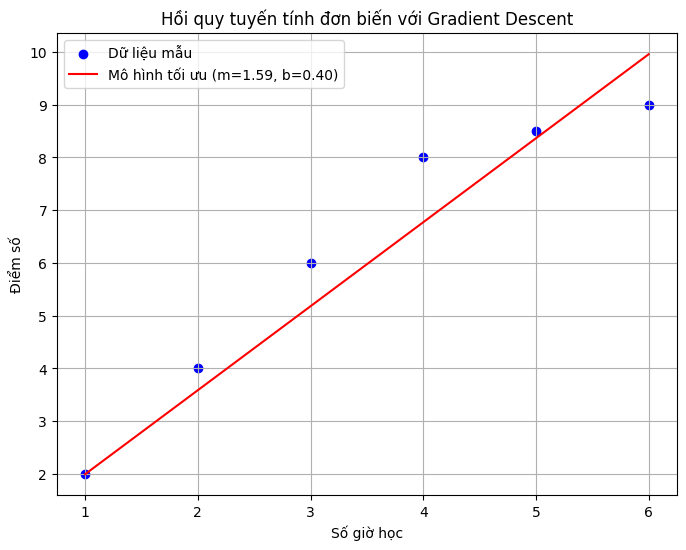

In [ ]:
# Vẽ đồ thị biểu diễn quá trình tối ưu
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dữ liệu mẫu')
plt.plot(X, m * X + b, color='red', label='Mô hình tối ưu (m={:.2f}, b={:.2f})'.format(m, b))
plt.xlabel('Số giờ học')
plt.ylabel('Điểm số')
plt.title('Hồi quy tuyến tính đơn biến với Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

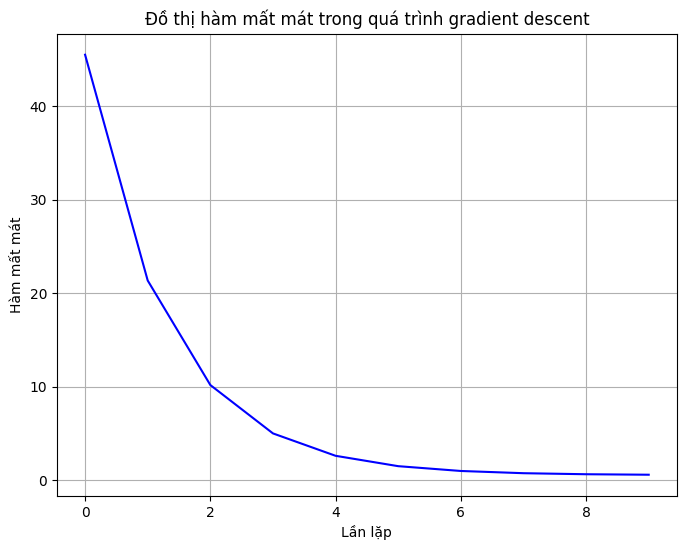

In [ ]:
# Vẽ đồ thị hàm mất mát
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, color='blue')
plt.xlabel('Lần lặp')
plt.ylabel('Hàm mất mát')
plt.title('Đồ thị hàm mất mát trong quá trình gradient descent')
plt.grid(True)
plt.show()

#TRIỂN KHAI THUẬT TOÁN VỚI DỮ LIỆU DỰ ĐOÁN GIÁ ĐIỆN THOẠI

Trong bài toán sử dụng thuật toán Gradient Descent cho hồi quy tuyến tính đơn biến để dự đoán giá điện thoại dựa vào chỉ số PPI (Phone Pixel Density)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV
data = pd.read_csv("https://raw.githubusercontent.com/thinh2904/Excel/main/Cellphone.csv")

data

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


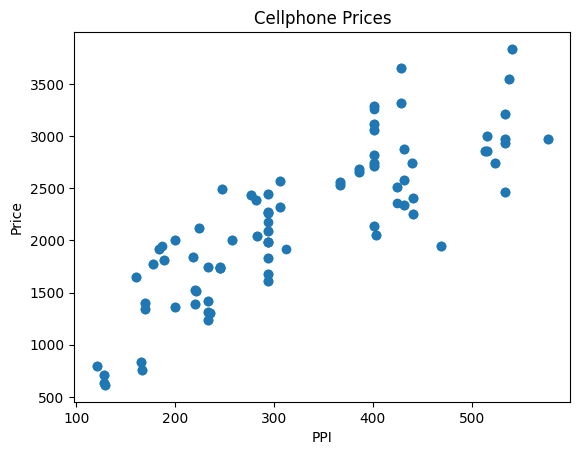

In [ ]:
# Loại bỏ các giá trị nhiễu
data = data[(data['ppi'] <= 600) & (data['Price'] <= 4000)]

# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = data['ppi']
y = data['Price']
n = len(X)

# Trực quan hóa dữ liệu ban đầu
plt.scatter(X, y)
plt.xlabel('PPI')
plt.ylabel('Price')
plt.title('Cellphone Prices')
plt.show()

In [ ]:
# Chuẩn hóa dữ liệu
X_normalized = (X - X.min()) / (X.max() - X.min())
y_normalized = (y - y.min()) / (y.max() - y.min())

# Số lượng mẫu và learning rate
m = len(X_normalized)
learning_rate = 0.01

# Thêm cột x0 = 1 vào ma trận y_normalized để tính intercept
X = np.c_[np.ones(m), X_normalized]

# Khởi tạo ngẫu nhiên các tham số m và b
theta = np.random.rand(2)

In [ ]:
# Hàm giả thiết
def hypothesis(X, theta):
    return X.dot(theta)

# Hàm mất mát (mean squared error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [ ]:
# Thực hiện gradient descent
num_iterations = 2000
theta_final, cost_history = gradient_descent(X, y_normalized, theta, learning_rate, num_iterations)

In [ ]:
print('Hệ số góc: ', theta_final[0])
print('Hệ số chặn: ', theta_final[1])

Hệ số góc:  0.2372134271410121
Hệ số chặn:  0.558336125489825


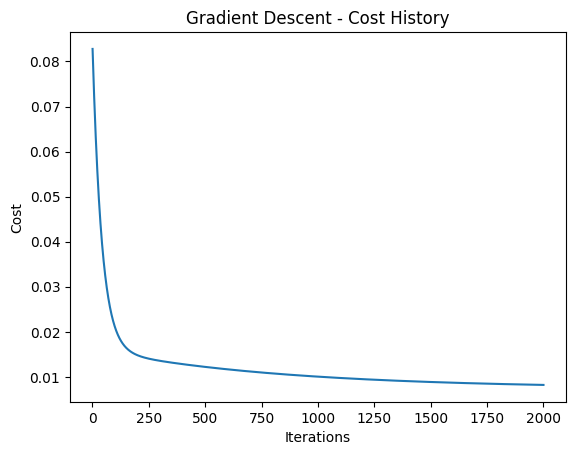

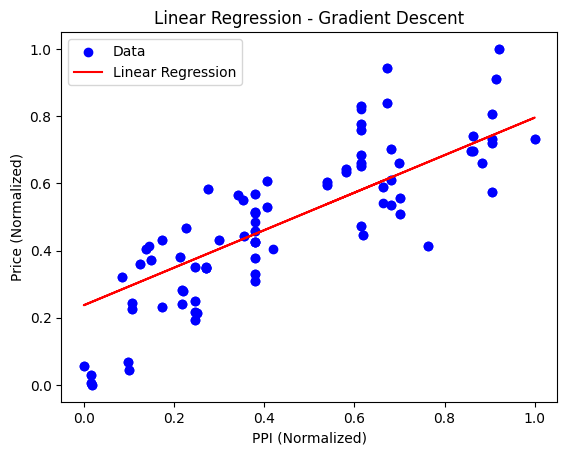

In [ ]:
# Trực quan hóa kết quả
plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent - Cost History')
plt.show()

# Vẽ đường thẳng hồi quy trên dữ liệu chuẩn hóa
plt.scatter(X_normalized, y_normalized, color='blue', label='Data')
plt.plot(X_normalized, hypothesis(X, theta_final), color='red', label='Linear Regression')
plt.xlabel('PPI (Normalized)')
plt.ylabel('Price (Normalized)')
plt.title('Linear Regression - Gradient Descent')
plt.legend()
plt.show()

Vậy ta tìm được phương trình hồi quy là: y = 0.23*X + 0.55